<a href="https://colab.research.google.com/github/UzielCard/Portfolio/blob/main/Analisis_HeartDiseaseDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Dataset

## Preparación

### Carga de librerias

#### Instalación

In [ ]:
!pip install dabl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importación

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as pps
import warnings
import dabl
import pickle

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score

### Lectura de la base de datos

In [ ]:
heart_df = pd.read_csv("datos_heart_disease-2.csv")

In [ ]:
heart_df

,Unnamed: 0,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,587,37.0,M,NAP,118.0,240.0,0.0,LVH,165.0,N,1.0,Flat,0
1,138,54.0,M,ASY,140.0,166.0,0.0,Normal,118.0,Y,0.0,Flat,1
2,573,72.0,M,ASY,NaN,123.0,1.0,LVH,130.0,N,1.5,Flat,1
3,390,51.0,M,ASY,140.0,0.0,0.0,Normal,60.0,N,0.0,Flat,1
4,517,65.0,M,NaN,150.0,235.0,0.0,NaN,120.0,Y,1.5,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,272,55.0,M,ASY,140.0,NaN,0.0,Normal,130.0,Y,3.0,Flat,1
796,443,60.0,M,ASY,130.0,186.0,1.0,ST,140.0,Y,0.5,Flat,1
797,646,66.0,M,ASY,160.0,228.0,0.0,LVH,138.0,N,2.3,NaN,0
798,118,NaN,F,TA,120.0,160.0,0.0,ST,185.0,N,0.0,Up,0


### Division de datos en Train y Test

In [ ]:
heart_df['Train'] = np.random.randint(1,11, heart_df.shape[0])
filtroTrain = (heart_df.Train > 2)

## Análisis exploratorio de datos (EDA)

### Exploración de la tabla

In [ ]:
heart_df.loc[filtroTrain].dtypes

Unnamed: 0          int64
Age               float64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
Train               int64
dtype: object

In [ ]:
drop_cols = ["Unnamed: 0", "HeartDisease", "Train"]
numericas = heart_df.select_dtypes(['int64','float64']).columns.drop(drop_cols)
categoricas = heart_df.select_dtypes(['object']).columns

### Gráficas Exploratorias

#### Variables numéricas

In [ ]:
len(numericas)

6

<AxesSubplot:xlabel='Oldpeak', ylabel='Count'>

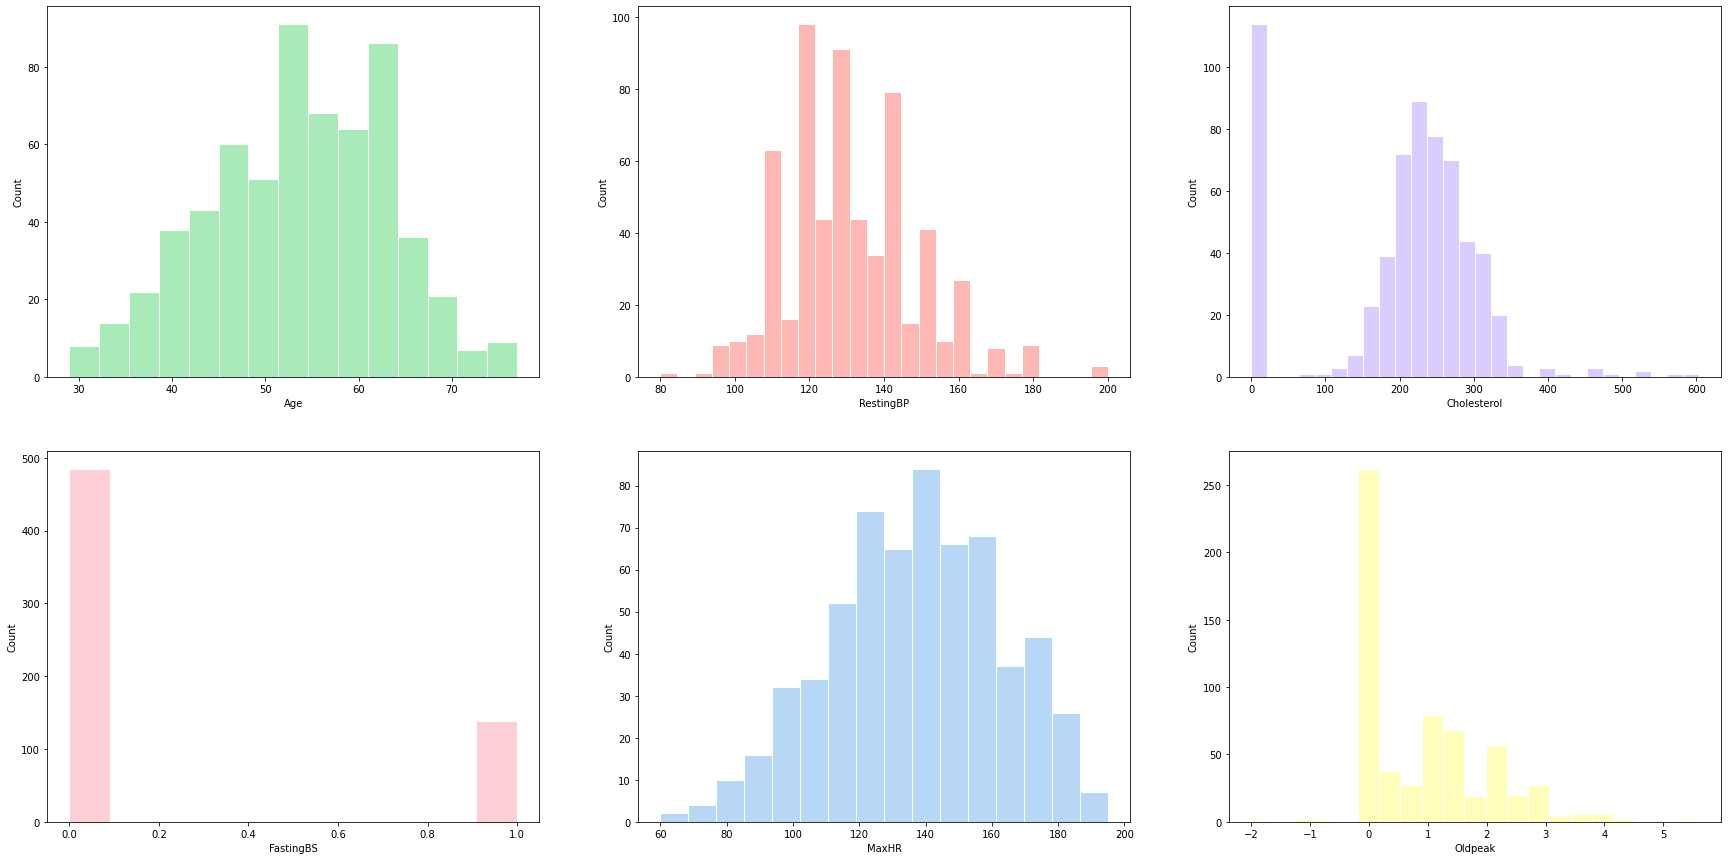

In [ ]:
f, axs = plt.subplots(2, 3, figsize=(30, 15))
sns.set_theme(style="white" ,palette="pastel")

sns.histplot(data=heart_df.loc[filtroTrain], x=numericas[0], ax=axs[0,0], color="g")
sns.histplot(data=heart_df.loc[filtroTrain], x=numericas[1], ax=axs[0,1], color="r")
sns.histplot(data=heart_df.loc[filtroTrain], x=numericas[2], ax=axs[0,2], color="m")
sns.histplot(data=heart_df.loc[filtroTrain], x=numericas[3], ax=axs[1,0], color="pink")
sns.histplot(data=heart_df.loc[filtroTrain], x=numericas[4], ax=axs[1,1], color="b")
sns.histplot(data=heart_df.loc[filtroTrain], x=numericas[5], ax=axs[1,2], color="y")

#### Variables Categóricas

In [ ]:
len(categoricas)

5

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

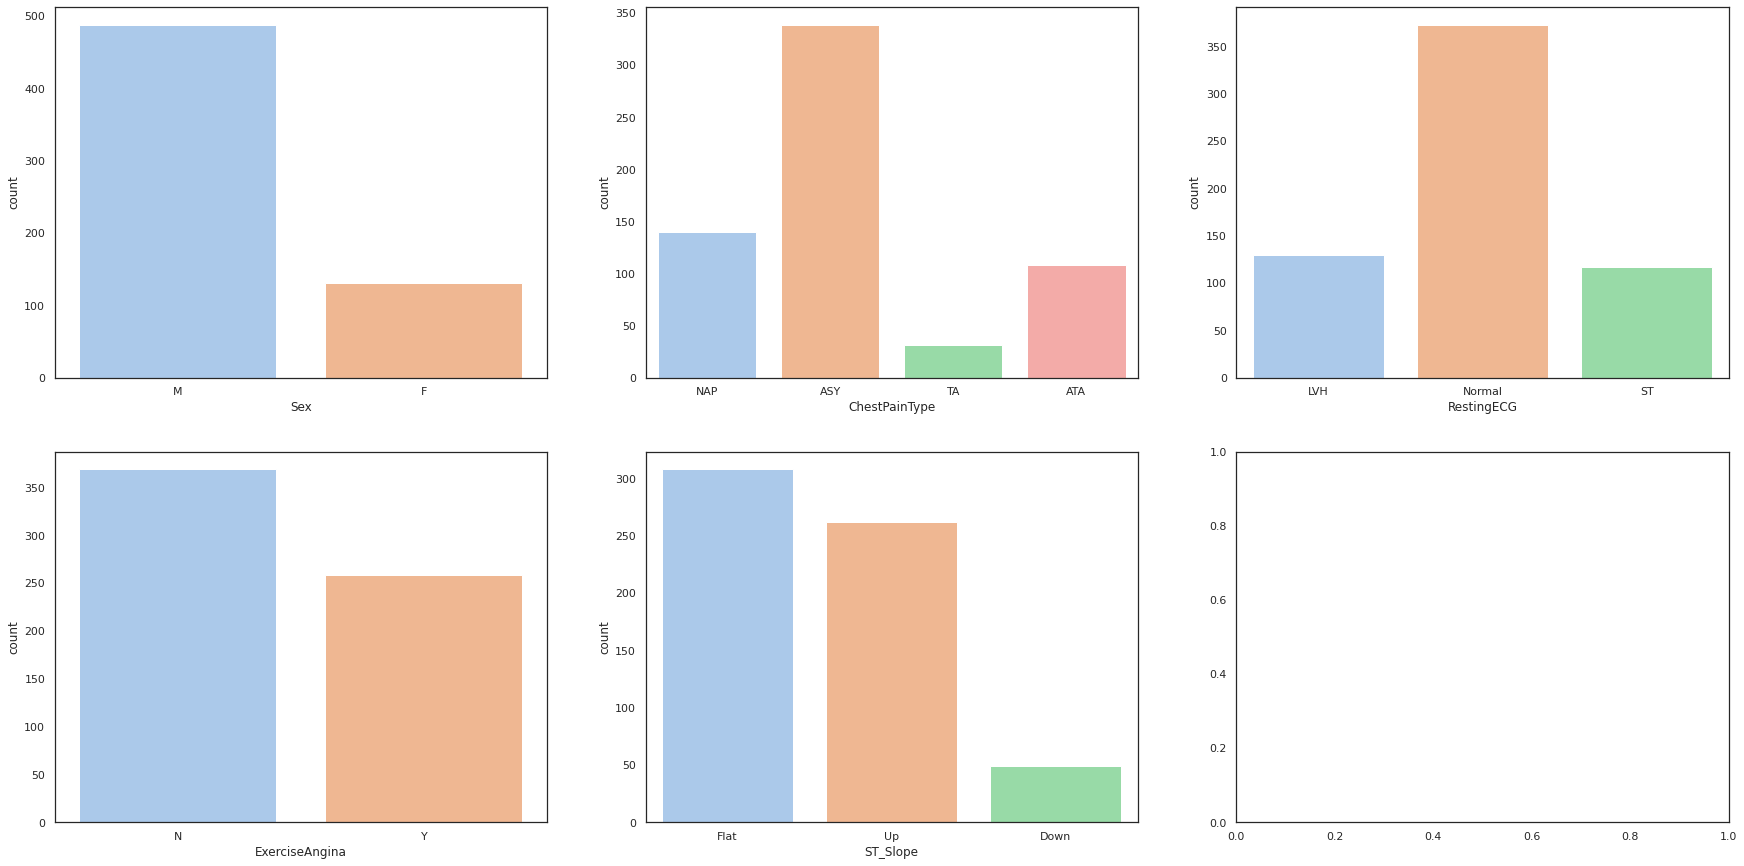

In [ ]:
f, axs = plt.subplots(2, 3, figsize=(30, 15))
sns.set_theme(style="white" ,palette="pastel")

sns.countplot(data=heart_df.loc[filtroTrain], x=categoricas[0], ax=axs[0,0])
sns.countplot(data=heart_df.loc[filtroTrain], x=categoricas[1], ax=axs[0,1])
sns.countplot(data=heart_df.loc[filtroTrain], x=categoricas[2], ax=axs[0,2])
sns.countplot(data=heart_df.loc[filtroTrain], x=categoricas[3], ax=axs[1,0])
sns.countplot(data=heart_df.loc[filtroTrain], x=categoricas[4], ax=axs[1,1])

### Estadística descriptiva básica

In [ ]:
heart_df.loc[filtroTrain].describe()

,Unnamed: 0,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Train
count,653.000000,618.000000,617.000000,617.000000,623.000000,621.000000,620.000000,653.000000,653.000000
mean,463.168453,53.470874,131.037277,201.534846,0.221509,137.075684,0.907742,0.546708,6.543645
std,264.670189,9.524342,17.388146,110.417563,0.415596,25.913860,1.056118,0.498195,2.322207
min,1.000000,29.000000,80.000000,0.000000,0.000000,60.000000,-2.000000,0.000000,3.000000
25%,238.000000,47.000000,120.000000,175.000000,0.000000,120.000000,0.000000,0.000000,4.000000
50%,469.000000,54.000000,130.000000,225.000000,0.000000,140.000000,0.600000,1.000000,7.000000
75%,696.000000,61.000000,140.000000,270.000000,0.000000,157.000000,1.600000,1.000000,9.000000
max,917.000000,77.000000,200.000000,603.000000,1.000000,195.000000,5.600000,1.000000,10.000000


### Identificación de atípicos

In [ ]:
(heart_df[numericas].loc[filtroTrain]>heart_df[numericas].loc[filtroTrain].quantile(0.975)).sum()

Age            16
RestingBP      13
Cholesterol    16
FastingBS       0
MaxHR          14
Oldpeak        15
dtype: int64

In [ ]:
(heart_df[numericas].loc[filtroTrain]<heart_df[numericas].loc[filtroTrain].quantile(0.025)).sum()

Age            14
RestingBP      11
Cholesterol     0
FastingBS       0
MaxHR          16
Oldpeak         6
dtype: int64

### Identificación de valores nulos

In [ ]:
heart_df.loc[filtroTrain].isna().sum()

Unnamed: 0         0
Age               35
Sex               34
ChestPainType     35
RestingBP         36
Cholesterol       36
FastingBS         30
RestingECG        33
MaxHR             32
ExerciseAngina    26
Oldpeak           33
ST_Slope          34
HeartDisease       0
Train              0
dtype: int64

## Procesamiento de datos

### Tratar valores nulos

In [ ]:
for i in numericas:
    x = heart_df.loc[filtroTrain, i].mean()
    heart_df[i].fillna(x, inplace = True)

In [ ]:
for i in categoricas:
    heart_df[i].fillna('Sin Categoria', inplace = True)

### Codificación de variables categóricas

In [ ]:
heart_df = pd.get_dummies(heart_df ,columns = categoricas,drop_first=True)

### Tratar atípicos

In [ ]:
for i in numericas:
    lim_sup = heart_df.loc[filtroTrain, i].quantile(0.975)
    lim_inf = heart_df.loc[filtroTrain, i].quantile(0.025)
    heart_df[i].clip(lim_inf, lim_sup, inplace=True)

### Escalamiento

In [ ]:
escMinMax = MinMaxScaler()

escMinMax.fit(heart_df.loc[filtroTrain,numericas])
escMinMax.transform(heart_df.loc[filtroTrain,numericas])

array([[0.05714286, 0.25714286, 0.69889342, 0.        , 0.82291667,
        0.2994012 ],
       [1.        , 0.44338967, 0.35818288, 1.        , 0.45833333,
        0.4491018 ],
       [0.45714286, 0.57142857, 0.        , 0.        , 0.        ,
        0.        ],
       ...,
       [0.71428571, 0.42857143, 0.5416424 , 1.        , 0.5625    ,
        0.1497006 ],
       [0.52773925, 0.28571429, 0.46592895, 0.        , 1.        ,
        0.        ],
       [0.17142857, 0.28571429, 0.58688074, 0.        , 0.875     ,
        0.        ]])

### Selección de variables

#### Correlaciones

In [ ]:
heart_df.loc[filtroTrain].corr(method = 'pearson')

,Unnamed: 0,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Train,Sex_M,...,ChestPainType_Sin Categoria,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_Sin Categoria,ExerciseAngina_Sin Categoria,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Sin Categoria,ST_Slope_Up
Unnamed: 0,1.000000,0.261018,0.010663,0.126595,0.043205,0.161672,0.156989,0.049748,-0.012472,-0.034302,...,-0.062267,0.061616,-0.246803,-0.158129,-0.011382,-0.012716,0.011650,0.011172,0.069598,-0.105310
Age,0.261018,1.000000,0.235240,-0.086396,0.183023,-0.368871,0.251768,0.258930,0.032822,0.034802,...,-0.035072,0.069641,-0.211940,0.100113,0.040377,0.007288,0.176749,0.185130,-0.042907,-0.244620
RestingBP,0.010663,0.235240,1.000000,0.080648,0.036030,-0.107244,0.159091,0.096240,0.020173,0.007170,...,0.007137,0.086951,-0.106917,0.072007,0.057989,-0.090835,0.146824,0.147054,-0.020695,-0.127832
Cholesterol,0.126595,-0.086396,0.080648,1.000000,-0.229474,0.222289,0.019145,-0.200905,0.037391,-0.118353,...,0.022036,0.015552,-0.050911,-0.127295,-0.003497,-0.063296,-0.040784,-0.059282,-0.009182,0.105805
FastingBS,0.043205,0.183023,0.036030,-0.229474,1.000000,-0.104845,0.067522,0.228512,-0.031434,0.069493,...,-0.035007,0.045741,-0.108273,0.149555,0.019532,-0.033970,0.070845,0.091499,-0.069478,-0.133854
MaxHR,0.161672,-0.368871,-0.107244,0.222289,-0.104845,1.000000,-0.202542,-0.385473,0.022547,-0.186853,...,0.026824,0.053654,0.002775,-0.143603,-0.049538,0.044839,-0.376495,-0.330156,0.040739,0.353465
Oldpeak,0.156989,0.251768,0.159091,0.019145,0.067522,-0.202542,1.000000,0.444276,-0.070506,0.098261,...,-0.031968,0.015628,-0.100765,0.082277,0.007679,-0.033655,0.419837,0.273939,0.053422,-0.475850
HeartDisease,0.049748,0.258930,0.096240,-0.200905,0.228512,-0.385473,0.444276,1.000000,0.003870,0.242155,...,-0.056475,-0.086045,-0.049241,0.080498,-0.000581,-0.097771,0.490499,0.527586,-0.021989,-0.591449
Train,-0.012472,0.032822,0.020173,0.037391,-0.031434,0.022547,-0.070506,0.003870,1.000000,0.075483,...,-0.111430,0.003560,0.028298,-0.028578,-0.084180,-0.030832,0.002348,0.008669,-0.022232,-0.000586
Sex_M,-0.034302,0.034802,0.007170,-0.118353,0.069493,-0.186853,0.098261,0.242155,0.075483,1.000000,...,-0.018091,-0.002766,0.001777,0.041936,0.021533,-0.025780,0.181596,0.111720,-0.101662,-0.077635


In [ ]:
heart_df.loc[filtroTrain].corr(method = 'spearman')

,Unnamed: 0,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Train,Sex_M,...,ChestPainType_Sin Categoria,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_Sin Categoria,ExerciseAngina_Sin Categoria,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Sin Categoria,ST_Slope_Up
Unnamed: 0,1.000000,0.264089,0.021531,0.111295,0.044403,0.167415,0.174242,0.048044,-0.011542,-0.034380,...,-0.061680,0.061355,-0.246260,-0.159048,-0.011275,-0.012132,0.010868,0.009992,0.069551,-0.104187
Age,0.264089,1.000000,0.247324,-0.006047,0.182128,-0.360849,0.280927,0.267425,0.031771,0.040948,...,-0.040747,0.077847,-0.211125,0.108429,0.026830,0.011994,0.177648,0.187725,-0.045480,-0.246441
RestingBP,0.021531,0.247324,1.000000,0.111134,0.053405,-0.105560,0.161863,0.101777,0.024458,0.018770,...,0.002840,0.076463,-0.102400,0.071093,0.065637,-0.085138,0.148299,0.142636,-0.014396,-0.118455
Cholesterol,0.111295,-0.006047,0.111134,1.000000,-0.140180,0.164396,0.033388,-0.090725,0.038233,-0.094026,...,0.019749,-0.010708,-0.071341,-0.096590,-0.019488,-0.070829,0.018164,-0.011170,0.019196,0.034513
FastingBS,0.044403,0.182128,0.053405,-0.140180,1.000000,-0.096747,0.100272,0.230461,-0.023533,0.069597,...,-0.021773,0.049354,-0.093183,0.142310,0.023117,-0.044598,0.080791,0.091527,-0.063171,-0.129213
MaxHR,0.167415,-0.360849,-0.105560,0.164396,-0.096747,1.000000,-0.242135,-0.383008,0.031661,-0.198641,...,0.021395,0.043793,0.010213,-0.154492,-0.044776,0.040126,-0.389207,-0.319991,0.034328,0.349135
Oldpeak,0.174242,0.280927,0.161863,0.033388,0.100272,-0.242135,1.000000,0.448294,-0.073475,0.103322,...,-0.035192,0.021970,-0.110567,0.089803,0.020160,-0.027025,0.449802,0.316886,0.044229,-0.500773
HeartDisease,0.048044,0.267425,0.101777,-0.090725,0.230461,-0.383008,0.448294,1.000000,0.003348,0.242155,...,-0.056475,-0.086045,-0.049241,0.080498,-0.000581,-0.097771,0.490499,0.527586,-0.021989,-0.591449
Train,-0.011542,0.031771,0.024458,0.038233,-0.023533,0.031661,-0.073475,0.003348,1.000000,0.075279,...,-0.110592,0.004005,0.029579,-0.030014,-0.083446,-0.031517,0.001650,0.007005,-0.021564,-0.000317
Sex_M,-0.034380,0.040948,0.018770,-0.094026,0.069597,-0.198641,0.103322,0.242155,0.075279,1.000000,...,-0.018091,-0.002766,0.001777,0.041936,0.021533,-0.025780,0.181596,0.111720,-0.101662,-0.077635


In [ ]:
heart_df.loc[filtroTrain].corr(method = 'kendall')

,Unnamed: 0,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Train,Sex_M,...,ChestPainType_Sin Categoria,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_Sin Categoria,ExerciseAngina_Sin Categoria,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Sin Categoria,ST_Slope_Up
Unnamed: 0,1.000000,0.180888,0.013019,0.073741,0.036324,0.110810,0.124569,0.039257,-0.007701,-0.028093,...,-0.050400,0.050134,-0.201224,-0.129961,-0.009213,-0.009914,0.008880,0.008165,0.056832,-0.085133
Age,0.180888,1.000000,0.176890,-0.004225,0.148040,-0.248594,0.203808,0.221811,0.021569,0.033963,...,-0.033797,0.064569,-0.175114,0.089935,0.022254,0.009948,0.147347,0.155706,-0.037723,-0.204407
RestingBP,0.013019,0.176890,1.000000,0.078576,0.044717,-0.073122,0.118790,0.085553,0.018022,0.015778,...,0.002387,0.064275,-0.086077,0.059761,0.055174,-0.071567,0.124659,0.119899,-0.012101,-0.099573
Cholesterol,0.073741,-0.004225,0.078576,1.000000,-0.114108,0.112718,0.024437,-0.075342,0.027415,-0.078083,...,0.016401,-0.008892,-0.059245,-0.080213,-0.016184,-0.058820,0.015084,-0.009277,0.015941,0.028661
FastingBS,0.036324,0.148040,0.044717,-0.114108,1.000000,-0.078217,0.085251,0.226285,-0.020163,0.068336,...,-0.021378,0.048460,-0.091495,0.139732,0.022698,-0.043790,0.079327,0.089869,-0.062027,-0.126871
MaxHR,0.110810,-0.248594,-0.073122,0.112718,-0.078217,1.000000,-0.174581,-0.315623,0.023064,-0.163693,...,0.017631,0.036088,0.008416,-0.127311,-0.036899,0.033066,-0.320731,-0.263693,0.028288,0.287709
Oldpeak,0.124569,0.203808,0.118790,0.024437,0.085251,-0.174581,1.000000,0.391403,-0.054903,0.090210,...,-0.030726,0.019182,-0.096536,0.078406,0.017602,-0.023595,0.392719,0.276672,0.038616,-0.437222
HeartDisease,0.039257,0.221811,0.085553,-0.075342,0.226285,-0.315623,0.391403,1.000000,0.002900,0.242155,...,-0.056475,-0.086045,-0.049241,0.080498,-0.000581,-0.097771,0.490499,0.527586,-0.021989,-0.591449
Train,-0.007701,0.021569,0.018022,0.027415,-0.020163,0.023064,-0.054903,0.002900,1.000000,0.065216,...,-0.095808,0.003470,0.025624,-0.026001,-0.072291,-0.027304,0.001429,0.006069,-0.018682,-0.000275
Sex_M,-0.028093,0.033963,0.015778,-0.078083,0.068336,-0.163693,0.090210,0.242155,0.065216,1.000000,...,-0.018091,-0.002766,0.001777,0.041936,0.021533,-0.025780,0.181596,0.111720,-0.101662,-0.077635


#### PPS

In [ ]:
warnings.filterwarnings("ignore")
ppscoreT = pps.matrix(heart_df.loc[filtroTrain])
tabla_pps = ppscoreT[ppscoreT['y'] == 'HeartDisease'].sort_values(by = ['ppscore'], ascending = False)
tabla_pps

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
168,HeartDisease,HeartDisease,1.000000,predict_itself,True,None,0.000000,1.000000,None
513,ST_Slope_Up,HeartDisease,0.287733,regression,True,mean absolute error,0.453292,0.322865,DecisionTreeRegressor()
467,ST_Slope_Flat,HeartDisease,0.209839,regression,True,mean absolute error,0.453292,0.358174,DecisionTreeRegressor()
444,ExerciseAngina_Y,HeartDisease,0.168739,regression,True,mean absolute error,0.453292,0.376805,DecisionTreeRegressor()
145,Oldpeak,HeartDisease,0.149731,regression,True,mean absolute error,0.453292,0.385421,DecisionTreeRegressor()
122,MaxHR,HeartDisease,0.075697,regression,True,mean absolute error,0.453292,0.418980,DecisionTreeRegressor()
260,ChestPainType_ATA,HeartDisease,0.044886,regression,True,mean absolute error,0.453292,0.432946,DecisionTreeRegressor()
7,Unnamed: 0,HeartDisease,0.027020,regression,True,mean absolute error,0.453292,0.441044,DecisionTreeRegressor()
99,FastingBS,HeartDisease,0.000000,regression,True,mean absolute error,0.453292,0.469546,DecisionTreeRegressor()
191,Train,HeartDisease,0.000000,regression,True,mean absolute error,0.453292,0.489366,DecisionTreeRegressor()


####Selección final de variables

In [ ]:
varSelected = ['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y', 'Oldpeak', 'MaxHR', 'ChestPainType_ATA']

## Creación y entrenamiento del modelo

### Preparación final de datos train y test

In [ ]:
X_train = heart_df.loc[filtroTrain, varSelected]
y_train = heart_df.loc[filtroTrain,  'HeartDisease']

X_test = heart_df.loc[~filtroTrain, varSelected]
y_test = heart_df.loc[~filtroTrain, 'HeartDisease']

### Selección de algoritmo base

In [ ]:
model = dabl.AnyClassifier()
model.fit(X_train, y_train)

best classifier:  LogisticRegression(C=1, multi_class='multinomial')
best score: 0.828


AnyClassifier()

### Entrenamiento del modelo

In [ ]:
modelo_logreg = LogisticRegression(C=1, multi_class='multinomial')
modelo_logreg.fit(X_train, y_train)

LogisticRegression(C=1, multi_class='multinomial')

### Generación de predicciones

In [ ]:
prediccion = modelo_logreg.predict(X_test)
prob_prediccion = modelo_logreg.predict_proba(X_test)[:,1]

## Evaluación del modelo

### Matriz de confusión

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred = prediccion, labels = [1, 0])
mat_conf = pd.DataFrame(cm, index=['Real: Sí', 'Real: No'], columns=['Pred: Sí', 'Pred:No'])
mat_conf

,Pred: Sí,Pred:No
Real: Sí,69,15
Real: No,16,47


### Precisión

In [ ]:
precision_score(y_test,prediccion)

0.8117647058823529

## Exportación del modelo

In [ ]:
filename = 'Modelo_HeartDisease.model'
pickle.dump(modelo_logreg,open(filename,'wb'))